In [3]:
import sys
import time

import pandas as pd
import numpy as np
from itertools import combinations
#from shap import Explanation
import sys
import torch
import math
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import math
import xgboost
#import shap
import time
import itertools
#from weighted_shapley import Weighted_Shapley
import warnings
warnings.filterwarnings('ignore') 

In [8]:
x1 =np.random.normal(0, 1, size=(10000, 1)) 
x2 = 0.707 *np.random.normal(0, 1, size=(10000, 1)) +0.707*x1
x3 = 0.707*np.random.normal(0, 1, size=(10000, 1)) +0.707*x2
arr = np.hstack((x1, x2, x3))
pd_data = pd.DataFrame(arr, columns=["x1", "x2", "x3"])
X = pd_data[["x1"]]
y = pd_data["x3"]

In [9]:
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]

In [10]:
lr.coef_

array([0.50493352])

In [4]:
# oracle = {'x1': {frozenset({'x2'}), frozenset({'x2', 'x3'})}, 
#            'x3': set(),
#           'x2': set(),
#           }
import itertools
s = ['x2', 'x3', 'x4', 'x5']
all_subsets = [subset for i in range(2,len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
oracle = {}
sets = {frozenset(s) for s in all_subsets}
x22 = {frozenset({'x2'})}
oracle['x1'] = sets.union(x22)
oracle['x2'] = set()
oracle['x3'] = set()
s = ['x2', 'x3', 'x1']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
print(all_subsets)
sets = {frozenset(s) for s in all_subsets}
oracle['x4'] = sets
oracle['x5'] = set()
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, 5)
a = sh.find_shapley(X.iloc[3], explanation_type="markov blanket", sparsest_oracle=oracle)
b = sh.find_shapley(X.iloc[3], explanation_type="sparsest", sparsest_oracle=oracle)

[(), ('x2',), ('x3',), ('x1',), ('x2', 'x3'), ('x2', 'x1'), ('x3', 'x1'), ('x2', 'x3', 'x1')]


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

 data point type is :<class 'pandas.core.series.Series'>
5


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

 data point type is :<class 'pandas.core.series.Series'>
5


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

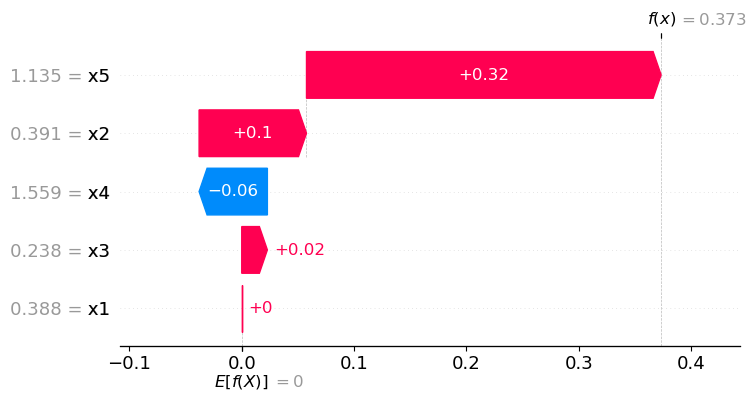

In [5]:
shap.waterfall_plot(a)

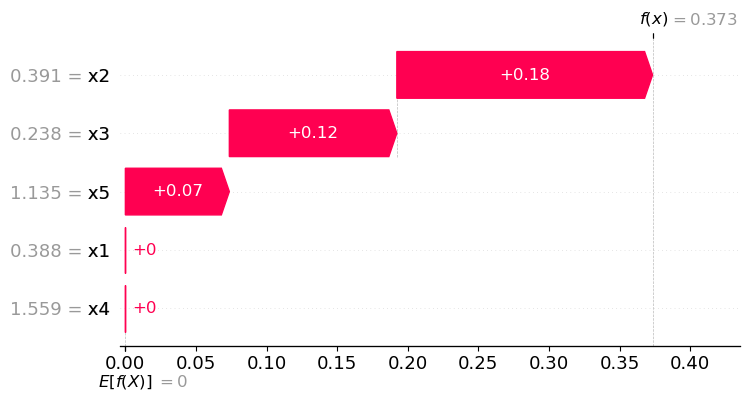

In [6]:
shap.waterfall_plot(b)

In [14]:
# oracle = {'x1': {frozenset({'x2'}), frozenset({'x2', 'x3'})}, 
#            'x3': set(),
#           'x2': set(),
#           }

# sh = Weighted_Shapley(X, y, lr, 3)
# a = sh.find_shapley(X.iloc[0], explanation_type="markov blanket", sparsest_oracle=oracle)
# print(f'sparsest shapley is \n{a}')


type of phi_i is <class 'pandas.core.series.Series'>
feture names are ['x1', 'x2', 'x3'] and parentchild is ['x2', 'x3']
['x1']
 permutations are [('x2', 'x3', 'x1'), ('x3', 'x2', 'x1')]
phi is   x1                     x2                      x3
0  0  [0.18838908430745124]   [-0.4652744135427961]
1  0   [0.1805053724009667]  [-0.45739070163631135]
type of phi_i is <class 'pandas.core.series.Series'>
sparsest shapley is 
x1    0.000000
x2    0.184447
x3   -0.461333
dtype: float64


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na